In [54]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

<Figure size 432x216 with 0 Axes>

## Exploratory data analysis

In [55]:
data =pd.read_csv(r"creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frecuencia')

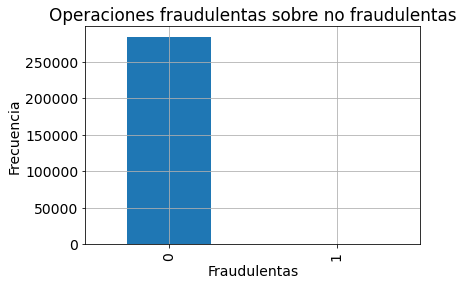

In [56]:
count_classes = pd.value_counts(data['Class'], sort = False)
# Método válido para clasificar cuando hay pocas categorias 
# count_classes es una serie
count_classes.plot (kind='bar')
plt.title ("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Frecuencia")


In [57]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


##### in our data 28 features are transformed versions of PCA but the Amount is the original one. And,
##### while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.
  

In [58]:
min(data.Amount),max(data.Amount)
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
min(data.Amount),max(data.Amount)

(-0.3532293929668236, 102.36224270928423)

#### Remove dupilcate 


In [60]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(283726, 31)
(283726, 31)


#####  plot the histogram of a variable from the dataset to see the skewness


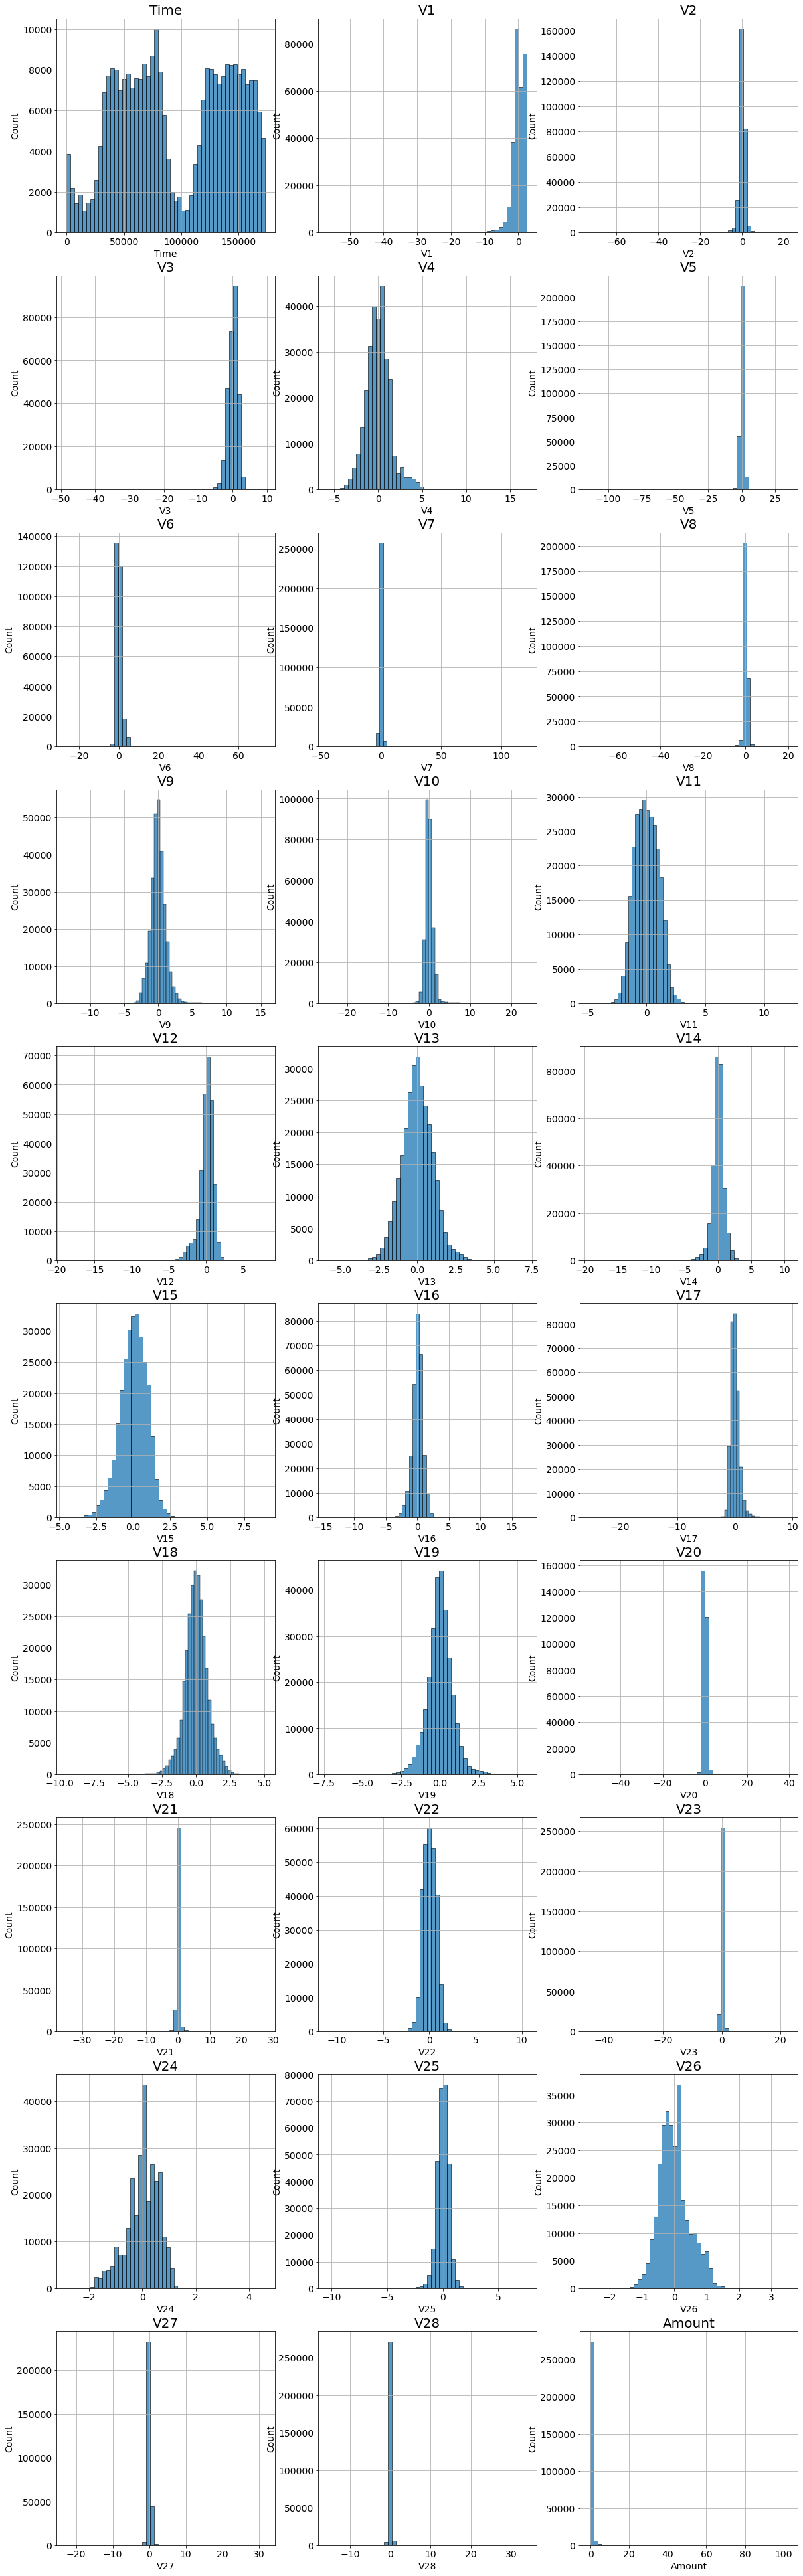

In [62]:
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20, 70))
for n, col in enumerate(data.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(data[col][data.Class == 1], bins=50)
    sns.histplot(data[col][data.Class ==  0], bins=50)
    plt.title(col, fontsize=20)
plt.show()

In [63]:
x = data.drop('Class', axis=1)
y = data.Class.values

### Feature Importance

#### Correlation

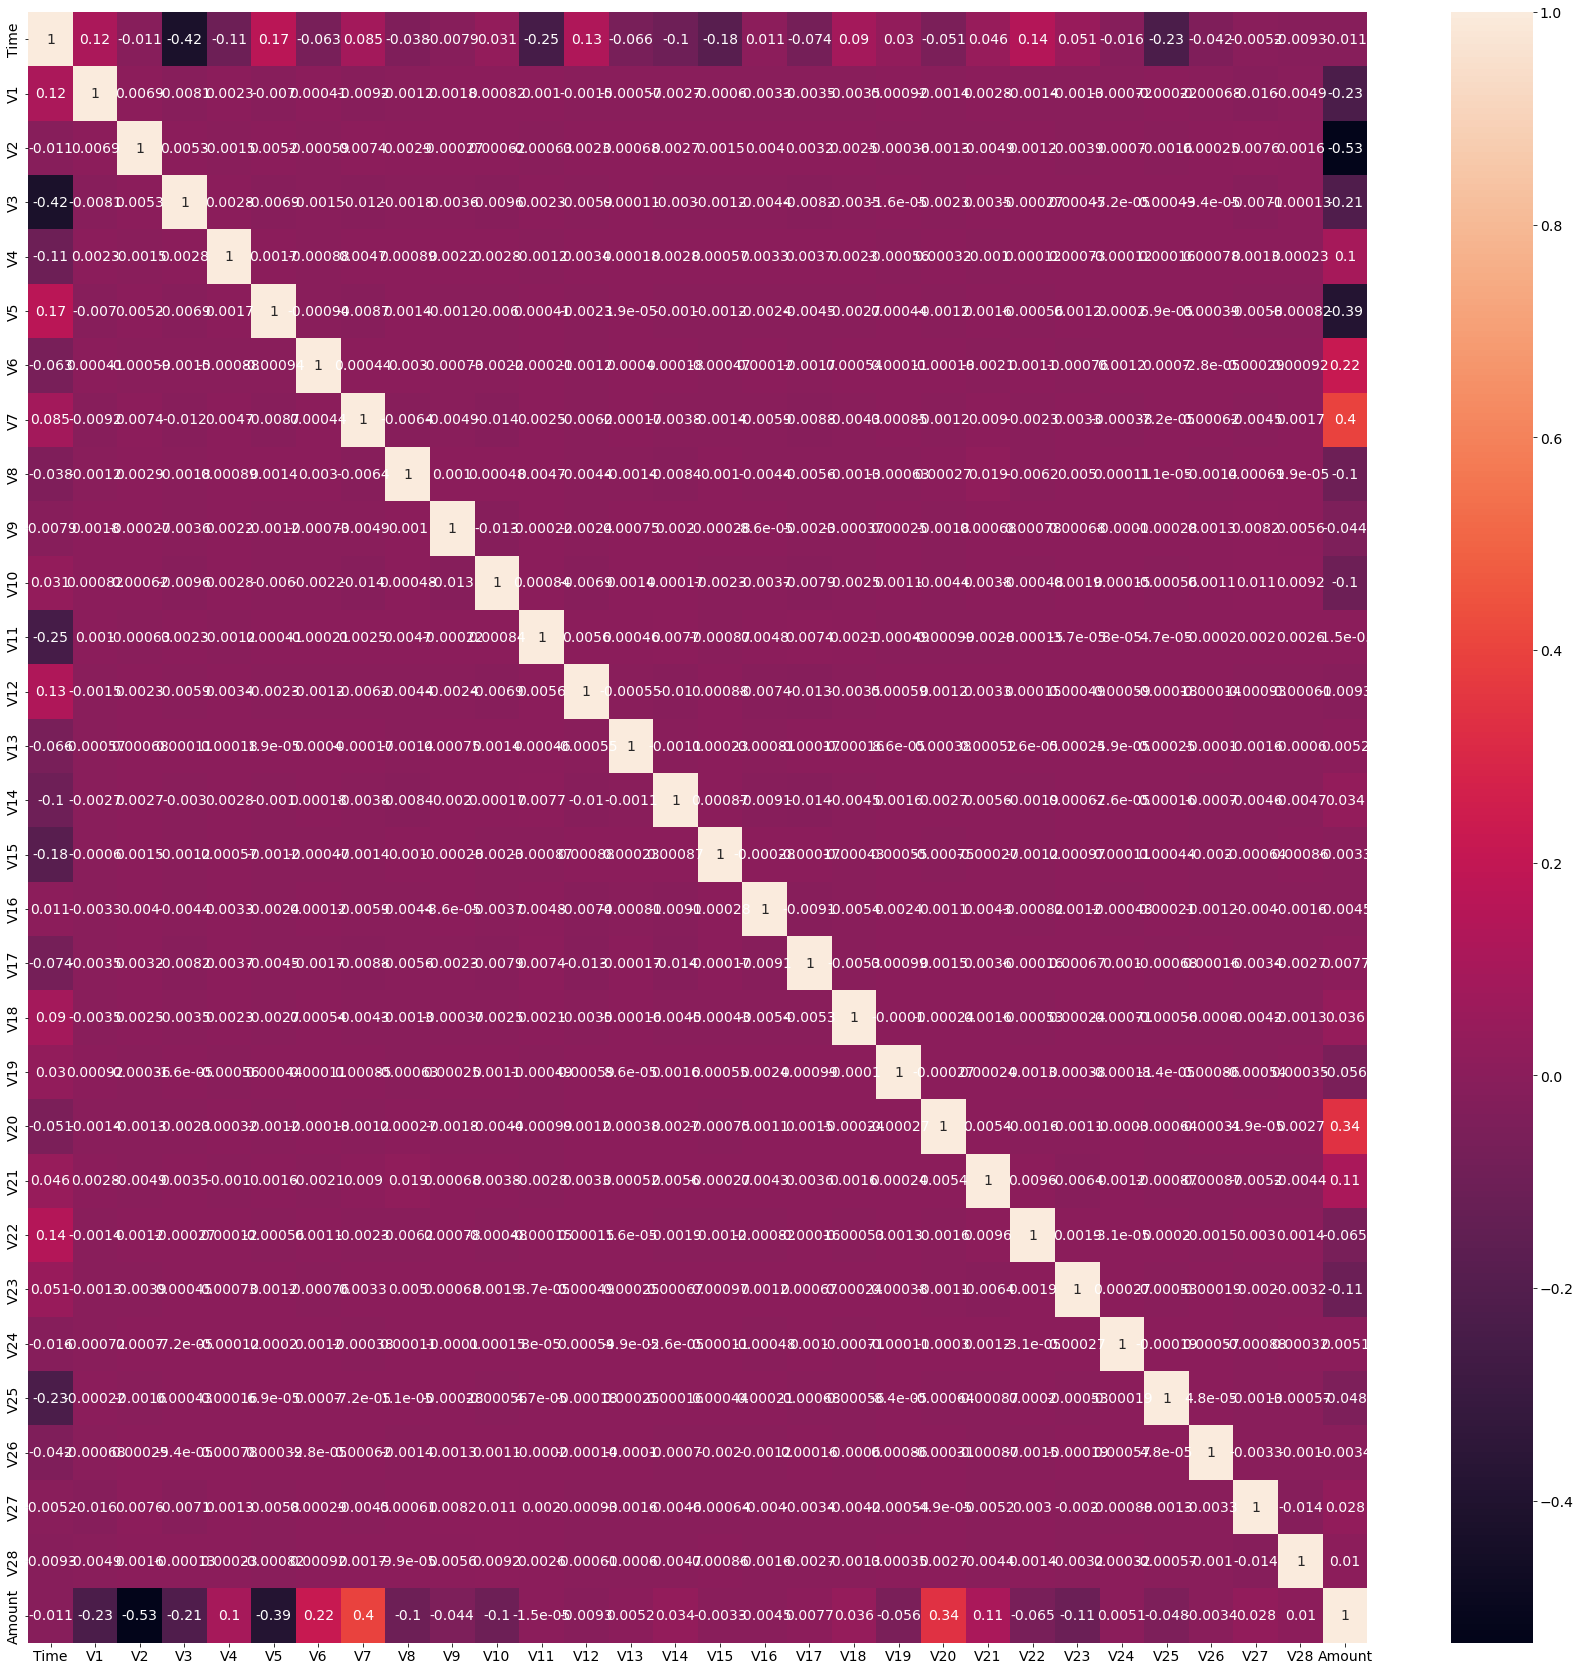

In [64]:
corr_matrix = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Logistic regression for feature importance

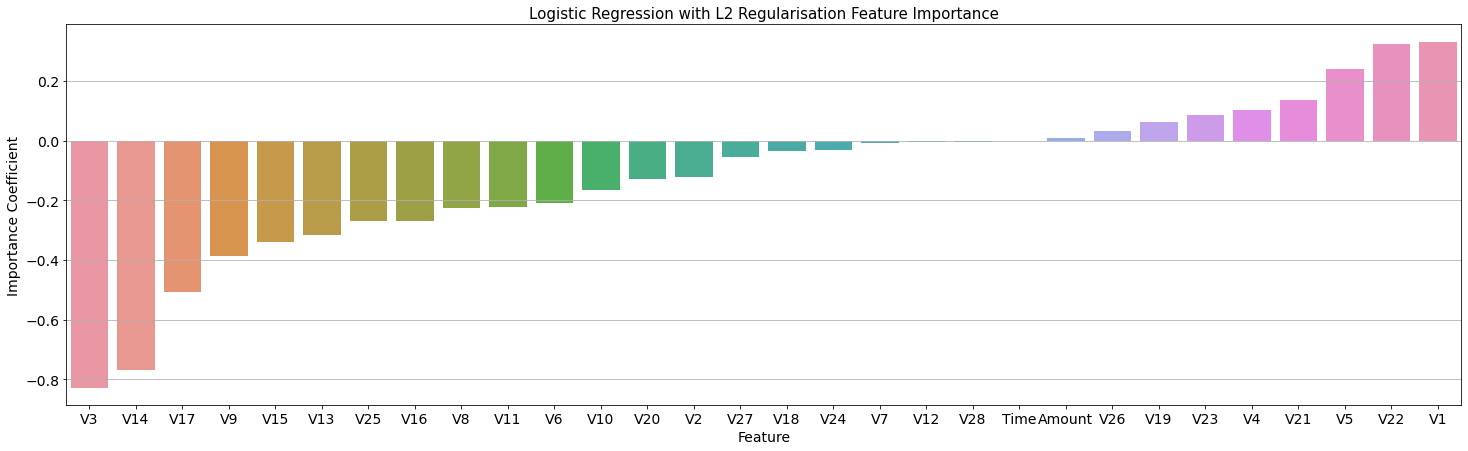

In [65]:
from sklearn.linear_model import LogisticRegression

X = data.drop('Class', axis = 1)
y = data['Class'].values

reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(X,y)

# coefficient matrix
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(25,7))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=15)

plt.show()

- There are no sifnificant coefficient with Amount and time with class as expected.
  lets remove those columns


In [66]:
x.drop(['Amount','Time'], axis=1, inplace=True)

### Summary of EDA

 We analyzed the features distribution and normalized none balance features such as amount.
 
 For features importance selection we used logistic regression and we decided to remove the features "time" and "amount".
 
 In the next step we will build and train machine learning models and train them against our new clean data

In conclusion
- Data looks clean
- No null values
- Majority of features are well distributed around mean
- There are some corereated features. but not strong enough to drop
- Dataset is highly imbalanced.
